In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor

# model evaluation matrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv(r"C:\Users\Shipun Meher\Internship\Task 1 - House Price Prediction(Regression)\House Price Prediction.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
print("Missing values:")
print(df.isnull().sum())
print("\nDuplicate values:",df.duplicated().sum())

Missing values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Duplicate values: 0


In [6]:
# statistical summery
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


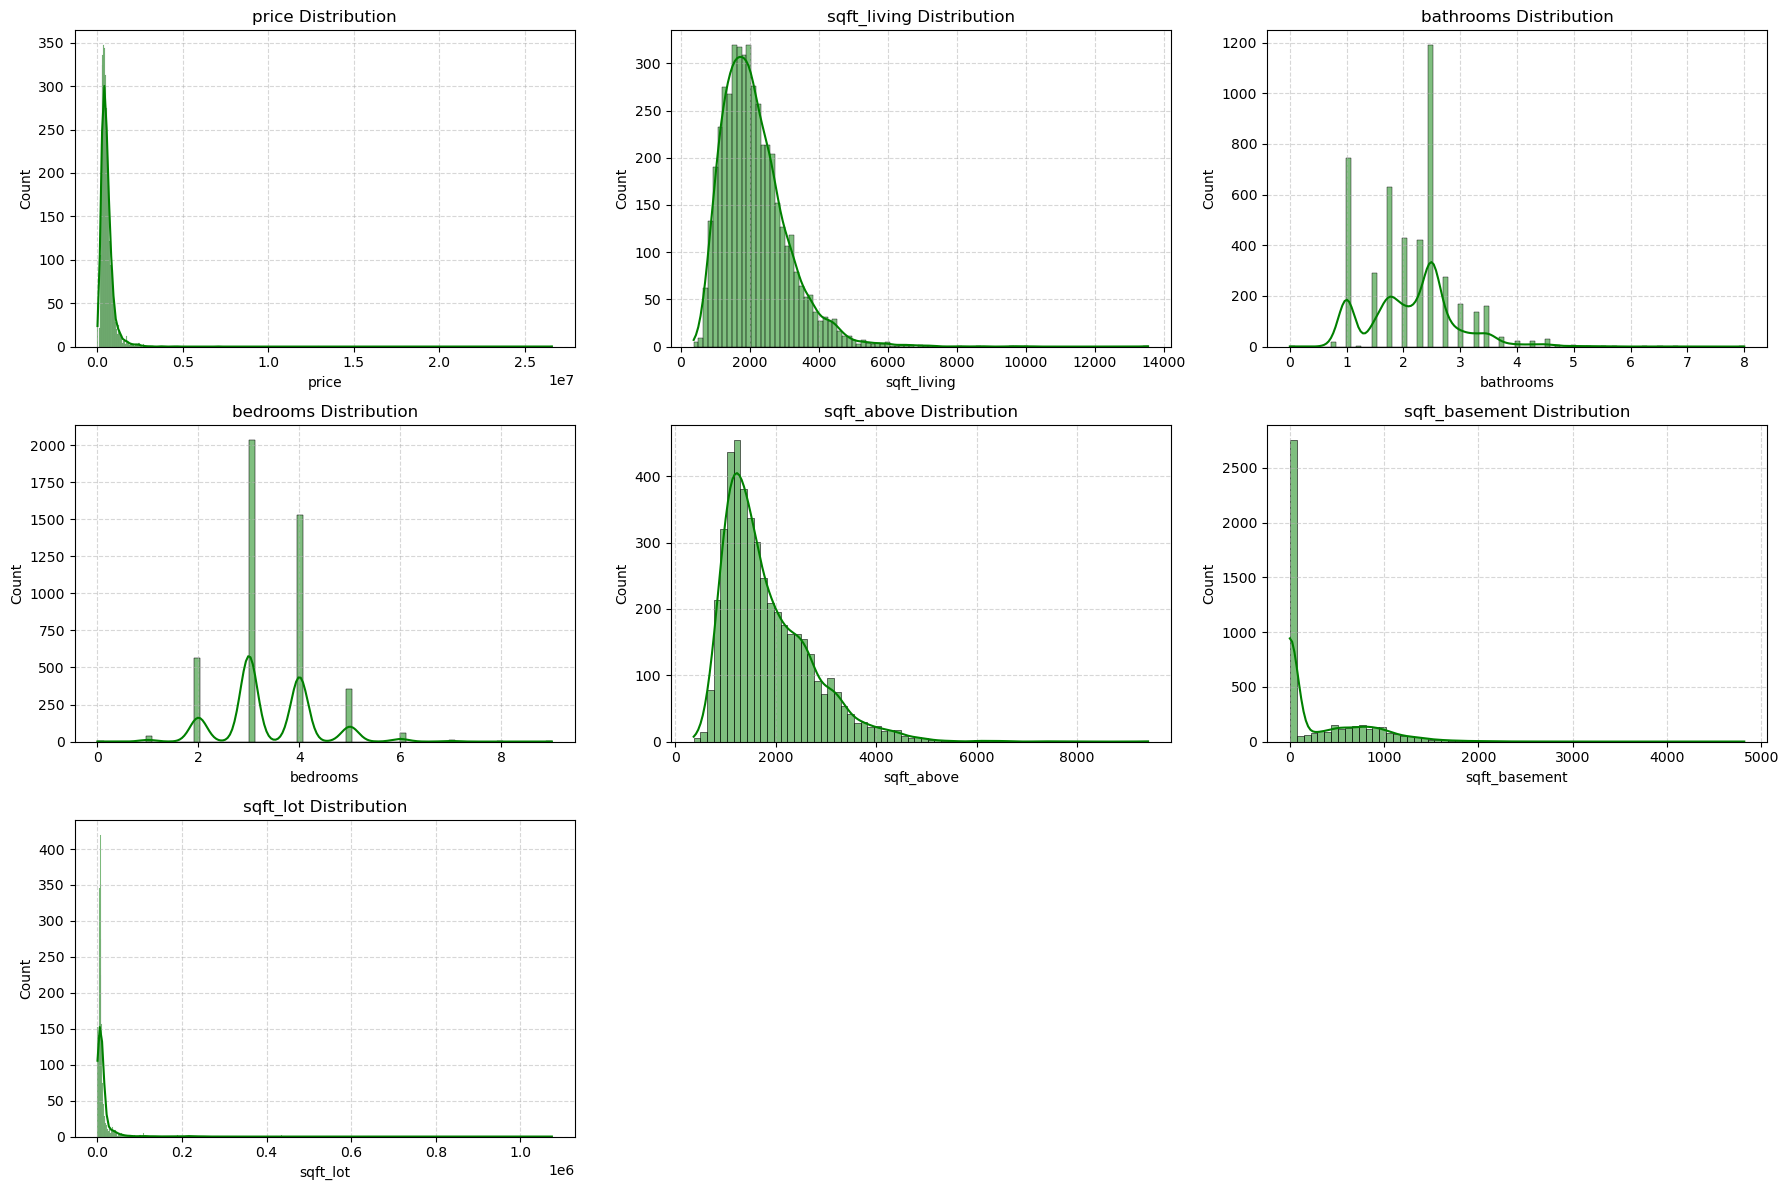

In [7]:
# List of features to plot
features = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 
            'sqft_above', 'sqft_basement', 'sqft_lot']

# Set up the subplot grid (3 rows x 3 columns to fit 7 plots neatly)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide unused subplots (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

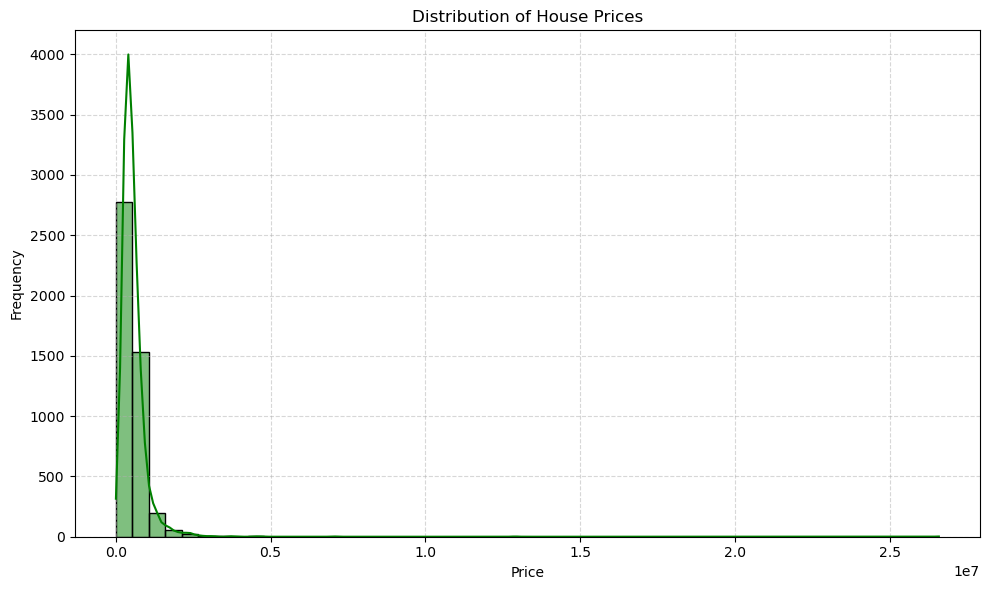

In [8]:
# distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='green')
# adding title and labals
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

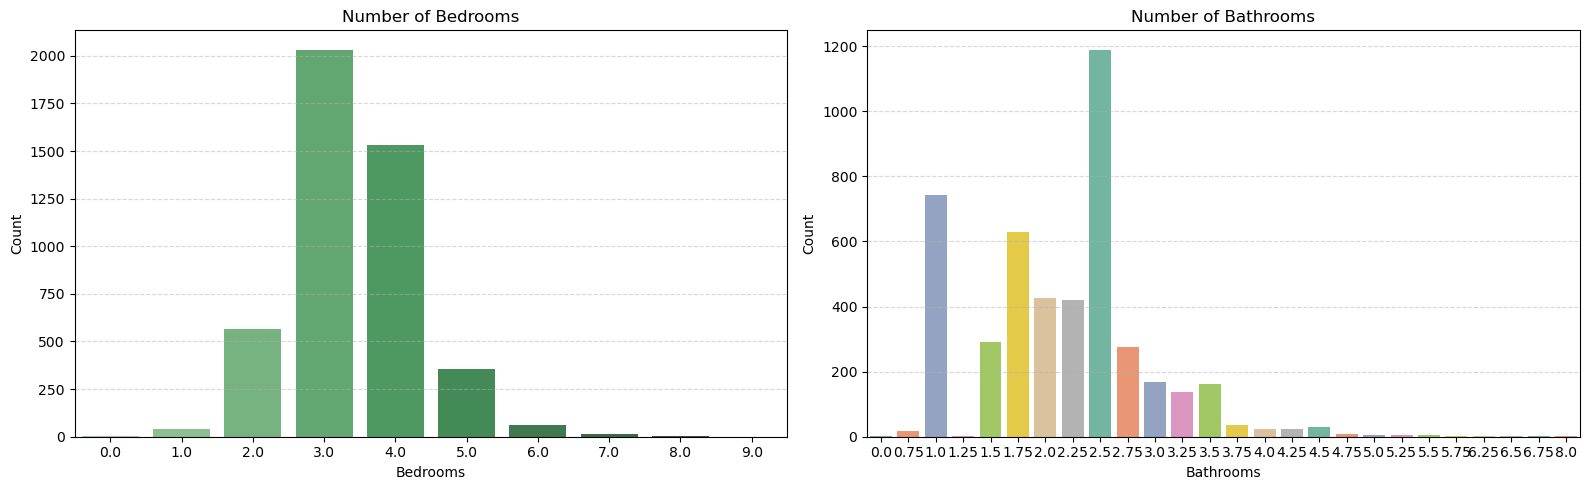

In [9]:
# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# First plot: Number of Bedrooms
sns.countplot(ax=axes[0], x='bedrooms', data=df, palette='Greens_d')
axes[0].set_title("Number of Bedrooms")
axes[0].set_xlabel("Bedrooms")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y', linestyle="--", alpha=0.5)

# Second plot: Number of Bathrooms
sns.countplot(ax=axes[1], x='bathrooms', data=df, palette='Set2')
axes[1].set_title("Number of Bathrooms")
axes[1].set_xlabel("Bathrooms")
axes[1].set_ylabel("Count")
axes[1].grid(axis='y', linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

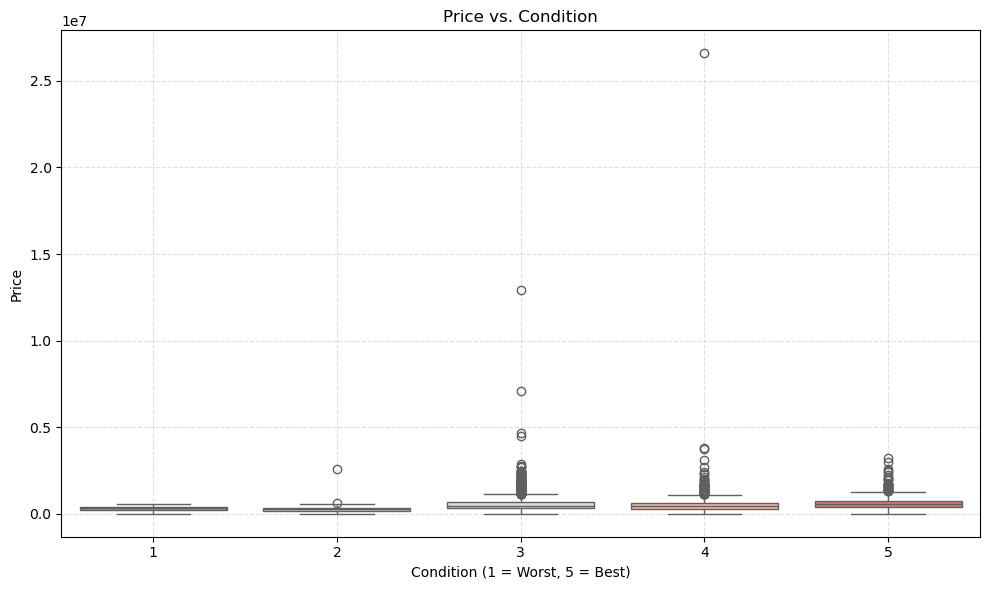

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')
plt.title("Price vs. Condition")
plt.xlabel("Condition (1 = Worst, 5 = Best)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

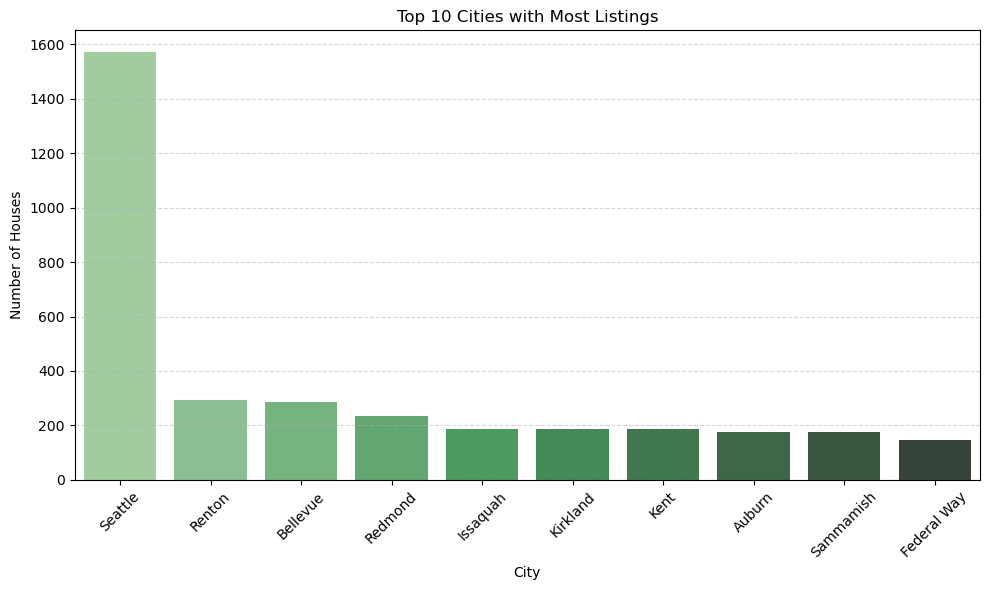

In [11]:
plt.figure(figsize=(10, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette='Greens_d')
plt.title("Top 10 Cities with Most Listings")
plt.xlabel("City")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

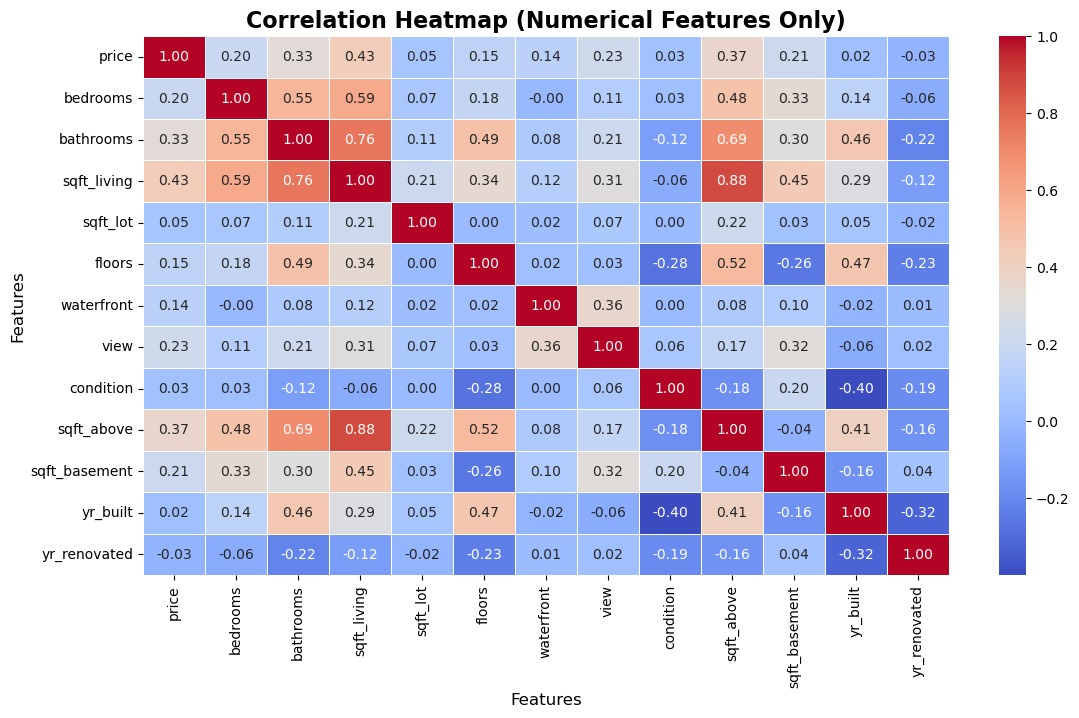

In [12]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Set figure size for better readability
plt.figure(figsize=(13, 7))

# Create a heatmap with improved styling
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding a title with emphasis
plt.title("Correlation Heatmap (Numerical Features Only)", fontsize=16, fontweight='bold')

# Improving axis labels for clarity
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Displaying the final plot
plt.show()

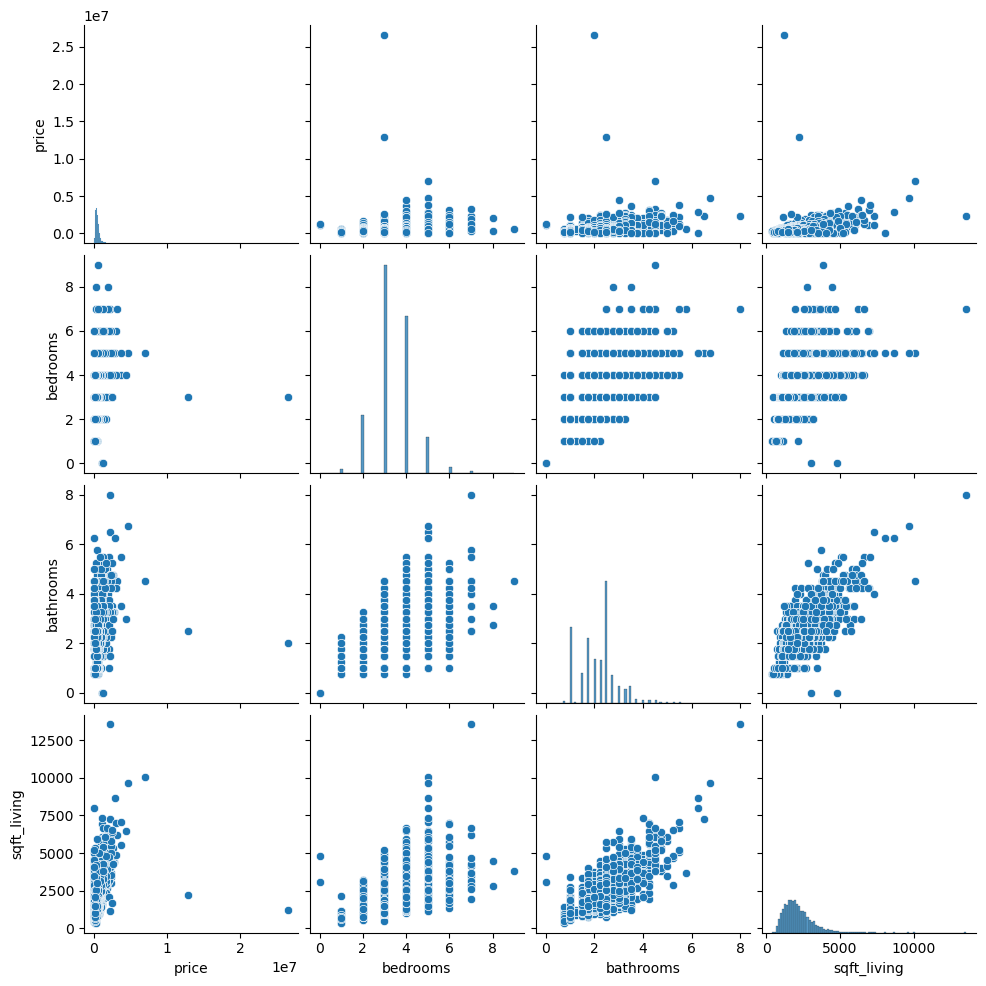

In [13]:
# pairplot
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living']])
plt.show()

In [14]:
print(f"Original dataset shape: {df.shape}")

def remove_outliers(df, x):
    # Set Limits
    # q25 => Frist Quatile and q75=> Third Quatile
    q25, q75 = np.percentile(df[x], 25), np.percentile(df[x], 75)
    # interQuatile range
    iqr = q75 - q25
    cut_off = iqr * 1.5
    # lower and upper bonds
    lower, upper = 1 ,  (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed'.format(x))
    return df

df = remove_outliers(df, 'price')
df = remove_outliers(df, 'sqft_lot')
print(f"After removing outliers from dataset shape: {df.shape}")

Original dataset shape: (4600, 18)
Outliers of "price" are removed
Outliers of "sqft_lot" are removed
After removing outliers from dataset shape: (3809, 18)


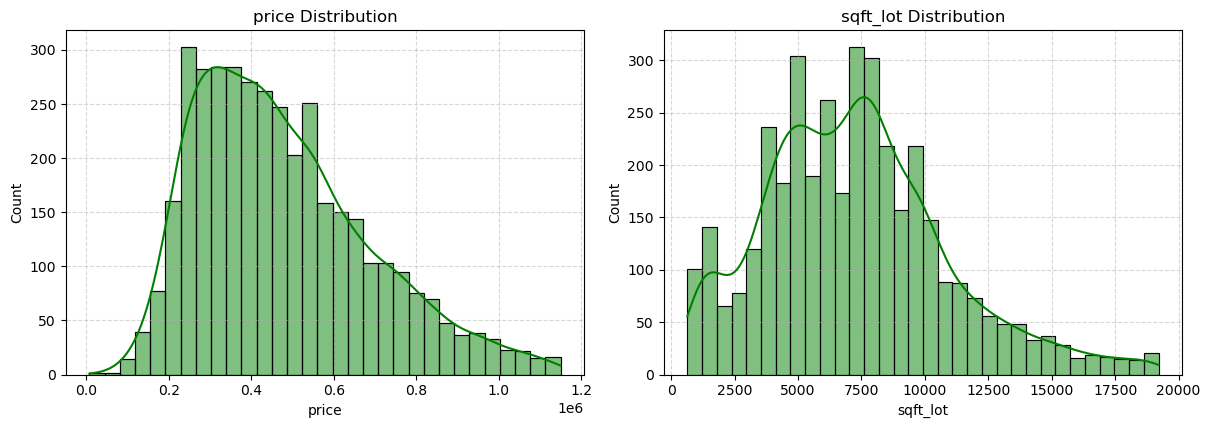

In [15]:
# List of features to plot
features = ['price', 'sqft_lot']

# Set up the subplot grid (3 rows x 3 columns to fit 7 plots neatly)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide unused subplots (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
# Extract year from date
df['year_sold'] = pd.to_datetime(df['date']).dt.year

In [17]:
# Create house age
df['house_age'] = df['year_sold'] - df['yr_built']

In [18]:
# Create binary renovation flag
df['has_been_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [19]:
# Drop unnecessary columns
df.drop(['date', 'yr_renovated', 'yr_built', 'street', 'country'], axis=1, inplace=True)

# Show updated DataFrame
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,year_sold,house_age,has_been_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,2014,59,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,2014,48,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,2014,51,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,2014,38,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,WA 98115,2014,76,1


In [20]:
# Target & Features
X = df.drop("price", axis=1)
y = df["price"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Numerical and categorical features
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'sqft_above', 'sqft_basement', 'house_age']
categorical_features = ['waterfront', 'view', 'condition', 'city', 'statezip', 'has_been_renovated']

In [24]:
# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [25]:
# create model list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

In [26]:
# store the trained models here
trained_models = {}

In [27]:
# train each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f"{name} trained successfully.")

Linear Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
XGBoost trained successfully.


In [28]:
# Dictionary to store evaluation results
evaluation_results = {
    "Model": [],
    "MAE": [],
    "RMSE": [],
    "R²": []
}

# Evaluate each trained model
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    evaluation_results["Model"].append(name)
    evaluation_results["MAE"].append(mae)
    evaluation_results["RMSE"].append(rmse)
    evaluation_results["R²"].append(r2)

# Create a DataFrame to display results
results_df = pd.DataFrame(evaluation_results)
results_df = results_df.sort_values(by="RMSE")
print("📊 Model Evaluation Results:")
display(results_df)

📊 Model Evaluation Results:


,Model,MAE,RMSE,R²
0,Linear Regression,68081.471606,104012.070301,0.767723
4,XGBoost,69296.938857,105003.356335,0.763274
2,Random Forest,77708.110604,116009.616478,0.711047
3,Gradient Boosting,83121.046610,116090.285052,0.710645
1,Decision Tree,106133.182792,157781.445388,0.465496


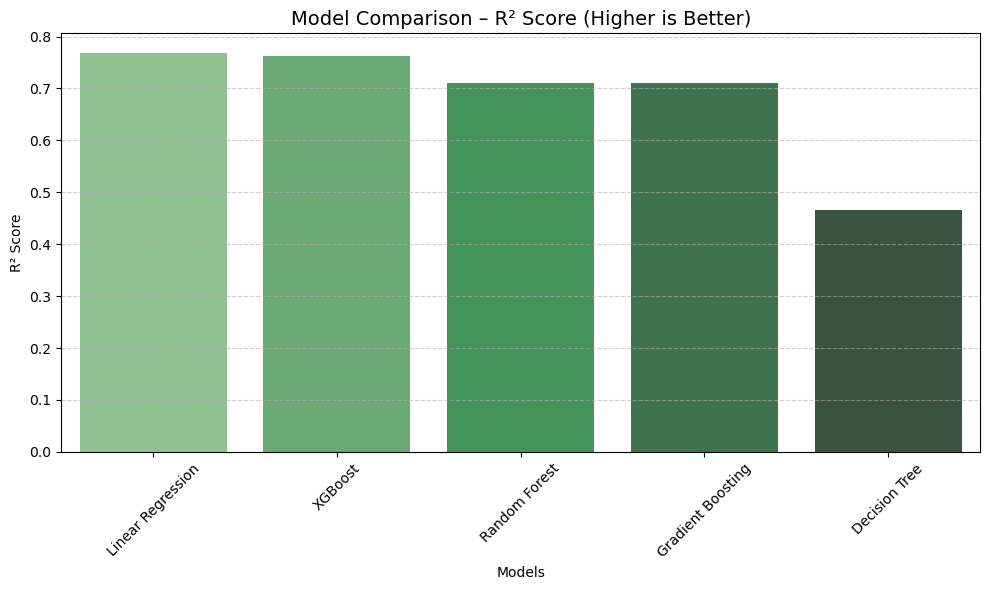

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R²", data=results_df, palette="Greens_d")
plt.title("Model Comparison – R² Score (Higher is Better)", fontsize=14)
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()